<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r11_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r11/4-fft-normal-n-0-6-9-15-r11.csv?token=AKVFSOBKW2IKYXKM6FAQTIK64IES4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r11/4-fft-malicious-n-0-6-9-15-m-1-11-r11.csv?token=AKVFSOAM6C2FKHHZICSOYCC64IETA')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,11,11,23,7,5,1,0,0.000000,4,145,1,145,145,0,20,3,27,0
1,11,3,1,1,1,4,3,9,15,15,23,7,6,2,1,0.500000,8,144,2,145,288,3,24,3,27,0
2,11,3,1,1,1,4,3,9,15,15,23,7,4,2,1,0.500000,8,85,1,85,85,3,16,3,27,1
3,15,3,4,1,1,4,3,9,9,9,23,7,4,3,2,0.666667,12,143,3,145,429,12,16,3,27,0
4,15,3,4,1,1,4,3,9,9,9,23,7,3,3,2,0.666667,12,84,2,85,168,12,12,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319888,3279288,4,0,6,3,2,3,12,27,11,24,8,60219,3,0,0.000000,18,5,15,19,75,0,2167884,18,216,0
319889,3279295,4,0,6,4,2,3,12,27,11,24,8,60219,3,0,0.000000,25,4,16,19,64,0,2890512,18,216,0
319890,3279302,4,0,6,5,3,3,12,27,11,24,8,60219,3,0,0.000000,32,3,17,19,51,0,5419710,18,216,0
319891,3279303,4,0,2,1,4,3,9,27,11,24,8,60220,3,0,0.000000,32,2,18,19,36,0,481760,6,54,0


In [6]:
df.shape

(319893, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r11/4-fft-malicious-n-0-6-9-15-m-1-12-r11.csv?token=AKVFSOG3LUFWAPSIQQXLUS264IETE')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r11/4-fft-malicious-n-0-6-9-15-m-1-7-r11.csv?token=AKVFSOG6IDUOYD6GREDN4KS64IETK')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r11/4-fft-malicious-n-0-6-9-15-m-11-12-r11.csv?token=AKVFSODRUR7UPSJ442ZW3QS64IETO')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r11/4-fft-malicious-n-0-6-9-15-m-7-11-r11.csv?token=AKVFSOBMHE2VPWA7AV345VC64IETY')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r11/4-fft-malicious-n-0-6-9-15-m-7-12-r11.csv?token=AKVFSOB4W4XKIGMJZRLIAFC64IEUC')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(157726, 26)
(162872, 26)
(209562, 26)
(214498, 26)
(165961, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.502676,-0.148270,-0.000897,0.001388,0.076022,0.182263,-0.008573,0.154625,-0.648713,-0.838156,-0.383265,-0.020060,0.015331,-0.003519,-0.004553,0.051944,-0.041159,-0.066875,0.093657,-0.001624
inport,-0.502676,1.000000,-0.025675,0.000848,-0.001312,0.119993,-0.015429,-0.043347,0.342245,0.686025,0.640351,0.271211,-0.039426,-0.064661,-0.077438,-0.065932,0.592116,-0.043444,0.075821,0.031918,0.055291
cache_coherence_type,-0.148270,-0.025675,1.000000,0.225930,-0.349698,-0.299881,-0.341431,0.037520,-0.018350,0.107281,0.193429,-0.034430,0.016911,-0.019855,-0.002190,0.000908,-0.053389,0.298423,0.625175,0.027623,0.006177
flit_id,-0.000897,0.000848,0.225930,1.000000,0.030237,0.194678,0.165045,0.001679,0.006268,0.004548,-0.001264,0.305298,-0.016526,0.010430,-0.004536,-0.004030,0.015894,0.645874,0.355950,0.275501,0.000708
flit_type,0.001388,-0.001312,-0.349698,0.030237,1.000000,-0.301326,-0.255459,-0.002599,-0.009701,-0.007039,0.001956,0.374916,-0.009446,0.019572,0.007533,0.006678,-0.024601,0.161290,-0.550945,-0.426426,-0.001096
vnet,0.076022,0.119993,-0.299881,0.194678,-0.301326,1.000000,0.969481,-0.050686,0.060573,-0.060551,-0.202506,-0.457966,-0.051777,0.004831,-0.034927,-0.033354,0.010103,-0.075929,0.557086,0.934073,0.018189
vc,0.182263,-0.015429,-0.341431,0.165045,-0.255459,0.969481,1.000000,-0.041672,0.021374,-0.178721,-0.329913,-0.492910,-0.039367,0.022559,-0.012505,-0.013919,-0.053825,-0.086762,0.495947,0.923832,0.004387
traversal_id,-0.008573,-0.043347,0.037520,0.001679,-0.002599,-0.050686,-0.041672,1.000000,-0.027351,-0.019656,-0.007800,0.028779,0.203406,0.204398,0.303397,0.233957,-0.079860,0.546841,-0.008806,-0.035016,-0.294703
hop_count,0.154625,0.342245,-0.018350,0.006268,-0.009701,0.060573,0.021374,-0.027351,1.000000,0.558711,0.136725,0.251300,-0.059924,-0.067854,-0.095063,-0.079797,0.294813,-0.021274,0.033583,0.031864,0.052437
current_hop,-0.648713,0.686025,0.107281,0.004548,-0.007039,-0.060551,-0.178721,-0.019656,0.558711,1.000000,0.805189,0.553681,-0.033160,-0.070388,-0.077037,-0.062122,0.250084,0.016758,0.043852,-0.100375,0.048844


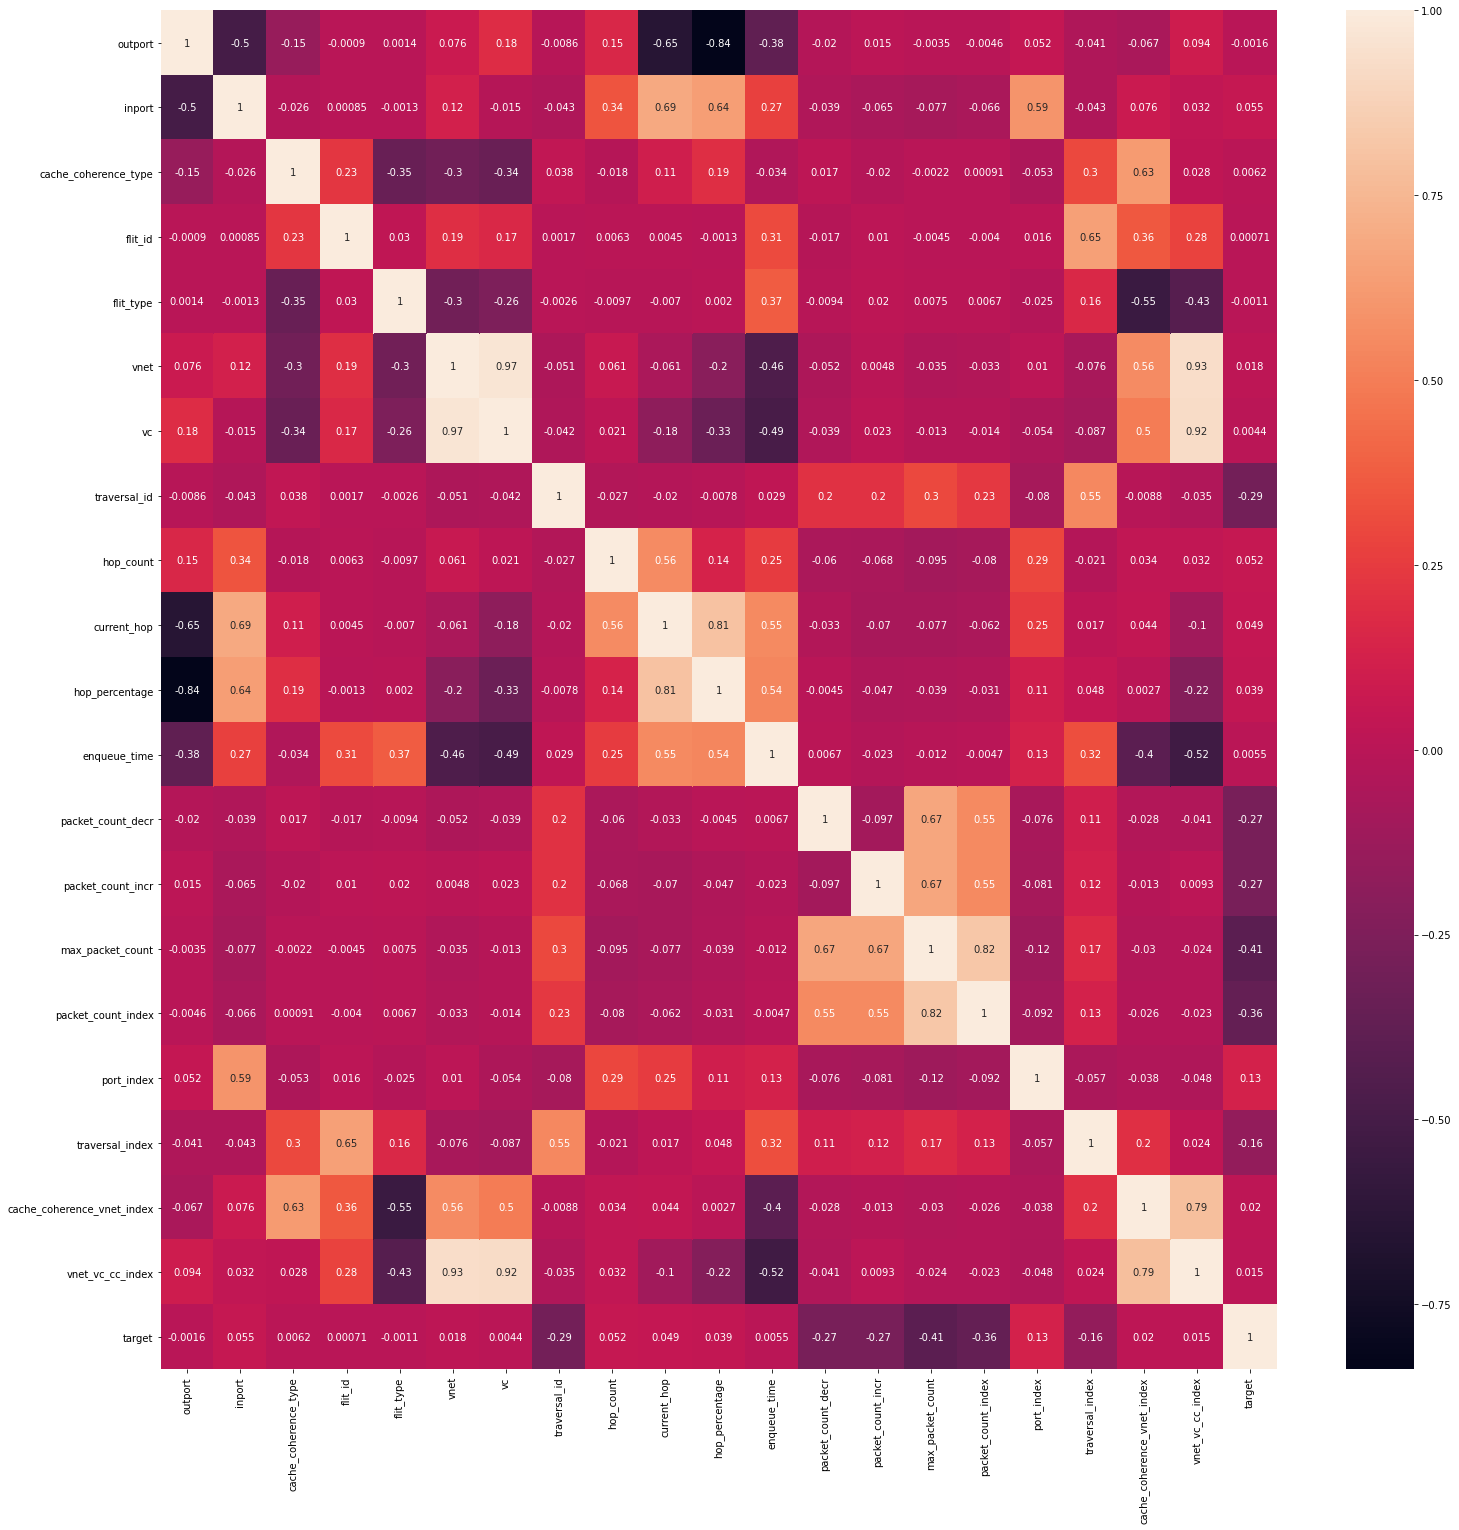

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

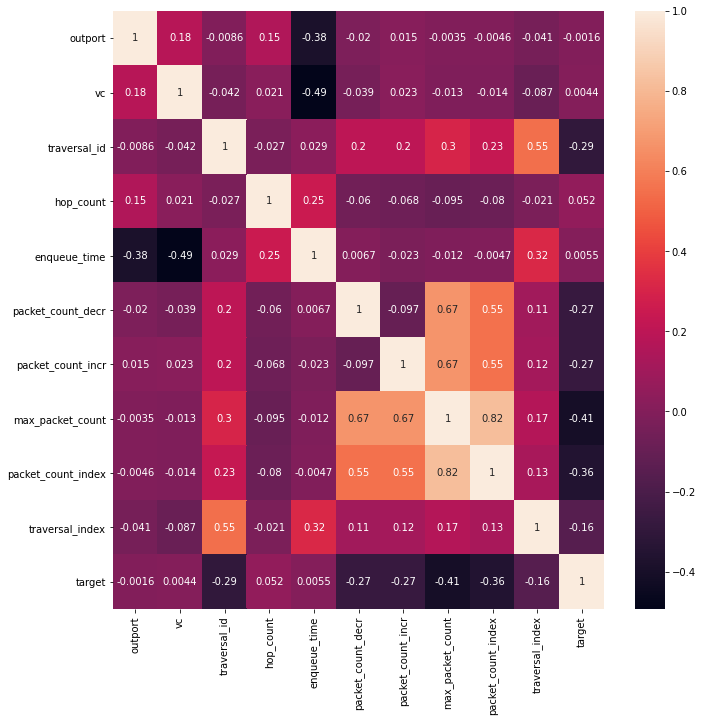

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

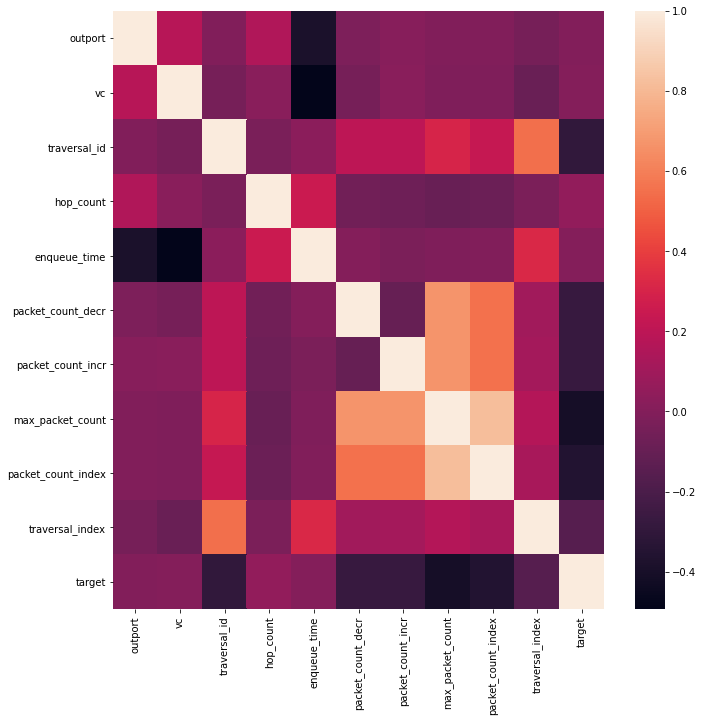

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000000,0.000033,0.166667,0.000000,0.457143,0.000000,0.457143,0.005732,1.476097e-06
1,0.75,0.000000,0.000050,0.333333,0.053333,0.453968,0.003175,0.457143,0.011425,2.214146e-06
2,0.75,0.000000,0.000017,0.333333,0.053333,0.266667,0.000000,0.266667,0.003344,7.380485e-07
3,0.75,0.000000,0.000017,0.500000,0.106667,0.450794,0.006349,0.457143,0.017038,7.380485e-07
4,0.75,0.000000,0.000000,0.500000,0.106667,0.263492,0.003175,0.266667,0.006648,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
319888,1.00,0.272727,0.999983,0.500000,0.186667,0.012698,0.044444,0.057143,0.002946,3.999987e-01
319889,1.00,0.272727,0.999983,0.500000,0.280000,0.009524,0.047619,0.057143,0.002508,5.333323e-01
319890,1.00,0.272727,0.999983,0.500000,0.373333,0.006349,0.050794,0.057143,0.001990,1.000000e+00
319891,1.00,0.000000,1.000000,0.500000,0.373333,0.003175,0.053968,0.057143,0.001393,8.888835e-02


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000000,0.000033,0.2,0.040816,0.313793,0.000000,0.313793,0.004269,1.475633e-06
1,0.75,0.000000,0.000000,0.4,0.081633,0.310345,0.003448,0.313793,0.008492,0.000000e+00
2,0.75,0.000000,0.000017,0.8,0.163265,0.306897,0.006897,0.313793,0.012620,7.378163e-07
3,0.25,0.727273,0.000033,0.2,0.040816,0.303448,0.010345,0.313793,0.016655,1.475633e-06
4,0.25,0.727273,0.000033,0.2,0.051020,0.300000,0.013793,0.313793,0.020596,1.475633e-05
...,...,...,...,...,...,...,...,...,...,...
157721,0.25,0.727273,0.999983,0.8,0.183673,0.013793,0.110345,0.124138,0.007694,1.777960e-01
157722,0.25,0.727273,0.999983,0.8,0.193878,0.010345,0.113793,0.124138,0.006334,2.666955e-01
157723,0.25,0.727273,0.999983,0.8,0.204082,0.006897,0.117241,0.124138,0.004879,3.555950e-01
157724,0.25,0.727273,0.999983,0.8,0.244898,0.003448,0.120690,0.124138,0.003331,6.667432e-01


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    206311
1    113582
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
8  packet_count_index  5549.039161
7    max_packet_count  5281.036538
2        traversal_id  3074.900265
6   packet_count_incr  2655.098809
5   packet_count_decr  2625.960326
9     traversal_index   954.608590
3           hop_count    61.009321
1                  vc     3.280696
4        enqueue_time     1.041339
0             outport     0.002667


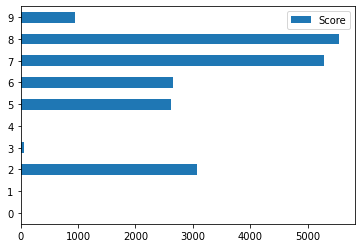

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.17336045686984
Test Prediction Score 98.00596788708378


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 84.68990527877457
Test Prediction Score 87.55648607495456
Test Prediction Score 87.55547284335901
Test Prediction Score 89.17798767354475
Test Prediction Score 84.60903465271961


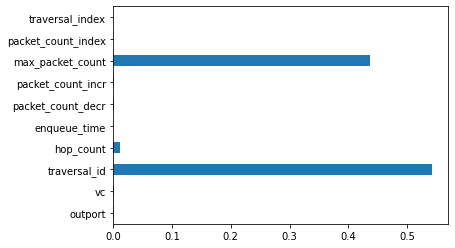

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

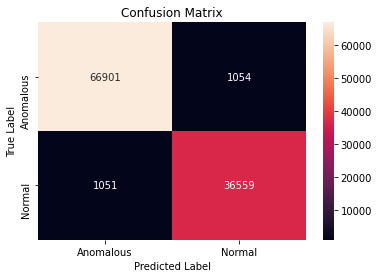

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     67955
           1       0.97      0.97      0.97     37610

    accuracy                           0.98    105565
   macro avg       0.98      0.98      0.98    105565
weighted avg       0.98      0.98      0.98    105565



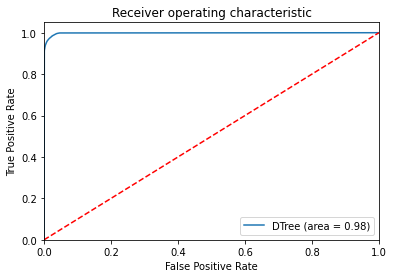

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r11l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.90906076824704


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.79752228548242
Test Prediction Score 89.05520899847733
Test Prediction Score 90.55219934911864
Test Prediction Score 92.03255974414681
Test Prediction Score 86.26484535523406


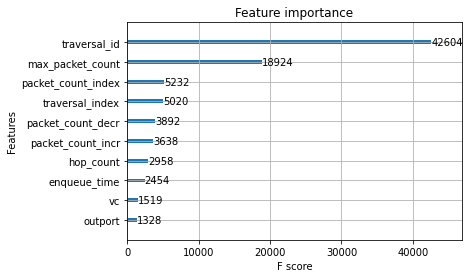

In [47]:
plot_importance(xgbc)
plt.show()

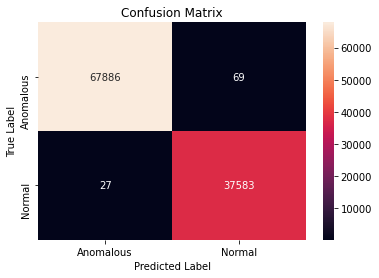

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67955
           1       1.00      1.00      1.00     37610

    accuracy                           1.00    105565
   macro avg       1.00      1.00      1.00    105565
weighted avg       1.00      1.00      1.00    105565



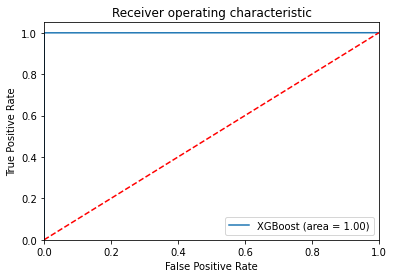

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()